# goal of this program is to extract Trapzoidal_ON data into different csv files

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks
import pandas as pd
import sys
fpath = '/Users/LingxinW/Box/Wang/PythonStuff'
sys.path.append(fpath)
import heka_reader 

In [17]:
cd ~/Box/Wang/Ephys_recording/ALM_ephys/recordingfiles

C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys\recordingfiles


In [42]:
myfile = heka_reader.Bundle ('191212.dat') # pick one specific recording file

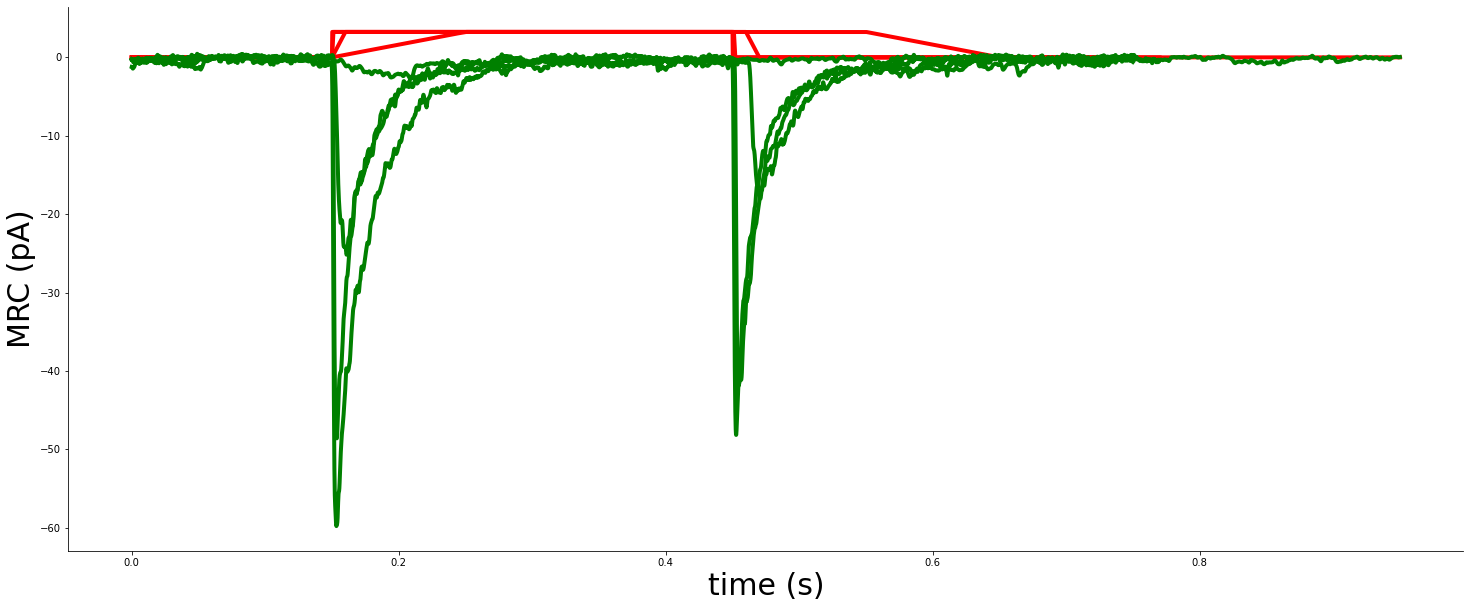

In [43]:


# Here is to analysis the Trapzoidal data in TrapRate X10

g=6 

x1 = np.arange(len(myfile.data[g,21,0,1]))/10000
x2 = np.arange(len(myfile.data[g,21,1,1]))/10000
x3 = np.arange(len(myfile.data[g,21,2,1]))/10000
x4 = np.arange(len(myfile.data[g,21,3,1]))/10000
#x5 = np.arange(len(myfile.data[2,21,4,1]))/10000
    
y1=stim_trap_swp1 = myfile.data[g,21,0,1]
y2=stim_trap_swp2 = myfile.data[g,21,1,1]
y3=stim_trap_swp3 = myfile.data[g,21,2,1]
y4=stim_trap_swp4 = myfile.data[g,21,3,1]
#stim_trap_swp5 = myfile.data[2,21,4,1]

# creat empty list of 1-5 sweeps and later put all three sweeps into this empty list
trap_swps=[]
sw1 = []
sw2 = []
sw3 = []
sw4 = []
#sw5 = []

# create a for loop to collect 1-4 sweeps in three series
n=[21,26,31]
for i in n:
    sw1.append(myfile.data[g,i,0,0]*1000000000000)
    sw2.append(myfile.data[g,i,1,0]*1000000000000)
    sw3.append(myfile.data[g,i,2,0]*1000000000000)
    sw4.append(myfile.data[g,i,3,0]*1000000000000)
   # sw5.append(myfile.data[2,i,4,0]*1000000000000)
  
# Now calculate the mean of three repeats by averaging the nested lists (lists in lists)
# here I just want to print to give one expample of the mean of three same sweeps, here sweep #1.
xc1 = np.arange(len(myfile.data[g,21,0,0]))/10000
xc2 = np.arange(len(myfile.data[g,21,1,0]))/10000
xc3 = np.arange(len(myfile.data[g,21,2,0]))/10000
xc4 = np.arange(len(myfile.data[g,21,3,0]))/10000
#xc5 = np.arange(len(myfile.data[2,21,4,0]))/10000

sw1_mean = (sw1[0]+sw1[1]+sw1[2])/3
sw2_mean = (sw2[0]+sw2[1]+sw2[2])/3
sw3_mean = (sw3[0]+sw3[1]+sw3[2])/3
sw4_mean = (sw4[0]+sw4[1]+sw4[2])/3
#sw5_mean = (sw5[0]+sw5[1]+sw5[2])/3

trap_swps.append(sw1_mean)
trap_swps.append(sw2_mean)
trap_swps.append(sw3_mean)
trap_swps.append(sw4_mean)
#trap_swps.append(sw1_mean)

# plot the averaged traces

fig, ax = plt.subplots (figsize=(25,10)) # set figure size
ax.spines ['top'].set_visible (False)
ax.spines ['right'].set_visible (False)
ax.set_xlabel ('time (s)', fontsize = 30)
ax.set_ylabel ('MRC (pA)', fontsize = 30)

#plt.plot (x, y1, 'o', markersize = 8, color = 'b')
plt.plot (x1, stim_trap_swp1, 'r-', lw=4)
plt.plot (x2, stim_trap_swp2, 'r-', lw=4)
plt.plot (x3, stim_trap_swp3, 'r-', lw=4)
plt.plot (x4, stim_trap_swp4, 'r-', lw=4)
#plt.plot (x5, stim_trap_swp5, 'r-', lw=4)

plt.plot (xc1, gaussian_filter (sw1_mean, 6), 'g-', lw=4)
plt.plot (xc2, gaussian_filter (sw2_mean, 3), 'g-', lw=4)
plt.plot (xc3, gaussian_filter (sw3_mean, 3), 'g-', lw=4)
plt.plot (xc4, gaussian_filter (sw4_mean, 3), 'g-', lw=4)
#plt.plot (xc5, gaussian_filter (sw5_mean, 3), 'g-', lw=4)

In [5]:
#TrapRate x10

t_peaks_on = []
amp_peaks_on = []


# it is very important to creat loops to fill the ampty lists
# do not forget to smooth the mean traces using gaussian_filter function
for i in range (4):
    t_peaks_on.append(np.argmax(-gaussian_filter(trap_swps[i][:2500],3))/10000)
    amp_peaks_on.append(gaussian_filter(trap_swps[i],3)[np.argmax(-gaussian_filter(trap_swps[i][:2500],3))])
   
    #t_peaks_off.append(((np.argmax(-mrc_swps[i][2000:3500]))+2000)/5000)
    #amp_peaks_off.append(mrc_swps[i][np.argmax(-mrc_swps[i][2000:3500])+2000])
t_start_act_on = []
#This for loop is to ...
y = [y1,y2,y3,y4]
for i in range (0,4):
    t_start_act_on.append((np.argmax(np.diff(gaussian_filter(np.diff(y[i][:2500]),3))))/10000)


t_half_act_on = [] # trap_on current half-time to maximum current

# you cannot calculate list minus list directly
# calculation should only happen elements by elements
# here time point switch from second - s to milisecond - ms by dividing time with 1000
for i in range (4):
    t_half_act_on.append(((t_peaks_on [i] - t_start_act_on[i])/2)*1000)
    
    
t_half_decay_on = []


for i in range (4):
    n=t_peaks_on[i]*10000
    m=int(n)
    t_half_decay_on.append ((((np.argmax(gaussian_filter(trap_swps[i][m:3000],3) > (amp_peaks_on[i]*0.5))+m)*(1/10000)) - t_peaks_on[i])*1000)
       
trap_rate = [80,800,7272,13333]
worm_strain = 4*['TU2769']
cell_ID = 4*['ALMLW020']


TrapData = {'worm_strain': worm_strain, 'cell_ID': cell_ID,'trap_rate': trap_rate, 'amp_peaks_on': amp_peaks_on, 't_peaks_on':t_peaks_on, \
            't_start_act_on': t_start_act_on, 't_half_act_on': t_half_act_on,'t_half_decay_on': t_half_decay_on, 'group_number': g+1}
TrapDataFrame = pd.DataFrame(TrapData)
#EphysDataFrame = EphysDataFrame.set_index(['cell_ID'])    
                        
dfpath = 'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/' 
##C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys

#wb = pd.ExcelWriter(dfpath +'ALMLW001.xlsx', engine='xlsxwriter')
TrapDataFrame.to_csv(r'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/ALMLW020_trapx10.csv',index =False, index_label = 'stim_um')



In [6]:
myfile = heka_reader.Bundle ('191212.dat') # pick one specific recording file

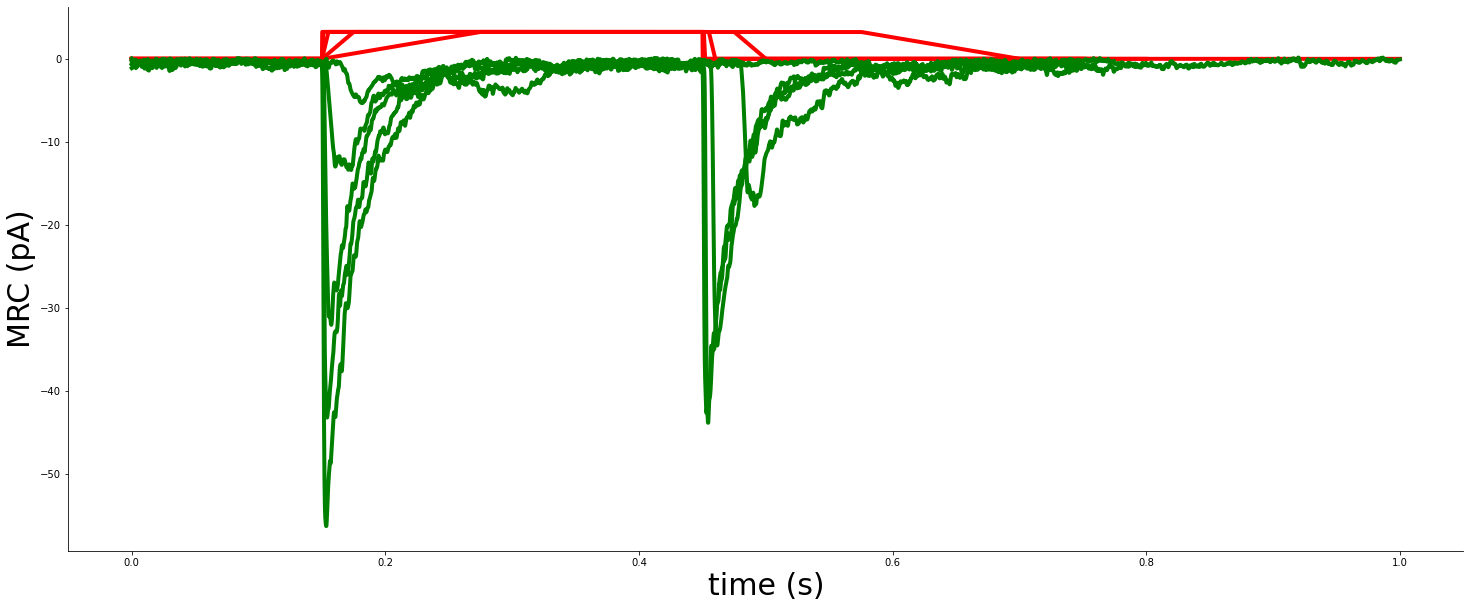

In [7]:

# Here is to analysis the Trapzoidal data in TrapRate X5

g=4

x1 = np.arange(len(myfile.data[g,22,0,1]))/10000
x2 = np.arange(len(myfile.data[g,22,1,1]))/10000
x3 = np.arange(len(myfile.data[g,22,2,1]))/10000
x4 = np.arange(len(myfile.data[g,22,3,1]))/10000
x5 = np.arange(len(myfile.data[g,22,4,1]))/10000
    
y1=stim_trap_swp1 = myfile.data[g,22,0,1]
y2=stim_trap_swp2 = myfile.data[g,22,1,1]
y3=stim_trap_swp3 = myfile.data[g,22,2,1]
y4=stim_trap_swp4 = myfile.data[g,22,3,1]
y5=stim_trap_swp5 = myfile.data[g,22,4,1]

# creat empty list of 1-5 sweeps and later put all three sweeps into this empty list
trap_swps=[]
sw1 = []
sw2 = []
sw3 = []
sw4 = []
sw5 = []

# create a for loop to collect 1-4 sweeps in three series
n=[22,27,32]
for i in n:
    sw1.append(myfile.data[g,i,0,0]*1000000000000)
    sw2.append(myfile.data[g,i,1,0]*1000000000000)
    sw3.append(myfile.data[g,i,2,0]*1000000000000)
    sw4.append(myfile.data[g,i,3,0]*1000000000000)
    sw5.append(myfile.data[g,i,4,0]*1000000000000)
  
# Now calculate the mean of three repeats by averaging the nested lists (lists in lists)
# here I just want to print to give one expample of the mean of three same sweeps, here sweep #1.
xc1 = np.arange(len(myfile.data[g,22,0,0]))/10000
xc2 = np.arange(len(myfile.data[g,22,1,0]))/10000
xc3 = np.arange(len(myfile.data[g,22,2,0]))/10000
xc4 = np.arange(len(myfile.data[g,22,3,0]))/10000
xc5 = np.arange(len(myfile.data[g,22,4,0]))/10000

sw1_mean = (sw1[0]+sw1[1]+sw1[2])/3
sw2_mean = (sw2[0]+sw2[1]+sw2[2])/3
sw3_mean = (sw3[0]+sw3[1]+sw3[2])/3
sw4_mean = (sw4[0]+sw4[1]+sw4[2])/3
sw5_mean = (sw5[0]+sw5[1]+sw5[2])/3

trap_swps.append(sw1_mean)
trap_swps.append(sw2_mean)
trap_swps.append(sw3_mean)
trap_swps.append(sw4_mean)
trap_swps.append(sw5_mean)

# plot the averaged traces

fig, ax = plt.subplots (figsize=(25,10)) # set figure size
ax.spines ['top'].set_visible (False)
ax.spines ['right'].set_visible (False)
ax.set_xlabel ('time (s)', fontsize = 30)
ax.set_ylabel ('MRC (pA)', fontsize = 30)

#plt.plot (x, y1, 'o', markersize = 8, color = 'b')
plt.plot (x1, stim_trap_swp1, 'r-', lw=4)
plt.plot (x2, stim_trap_swp2, 'r-', lw=4)
plt.plot (x3, stim_trap_swp3, 'r-', lw=4)
plt.plot (x4, stim_trap_swp4, 'r-', lw=4)
plt.plot (x5, stim_trap_swp5, 'r-', lw=4)

plt.plot (xc1, gaussian_filter (sw1_mean, 3), 'g-', lw=4)
plt.plot (xc2, gaussian_filter (sw2_mean, 3), 'g-', lw=4)
plt.plot (xc3, gaussian_filter (sw3_mean, 3), 'g-', lw=4)
plt.plot (xc4, gaussian_filter (sw4_mean, 3), 'g-', lw=4)
plt.plot (xc5, gaussian_filter (sw5_mean, 3), 'g-', lw=4)

In [8]:
#TrapRate x5

t_peaks_on = []
amp_peaks_on = []


# it is very important to creat loops to fill the ampty lists
# do not forget to smooth the mean traces using gaussian_filter function
for i in range (5):
    t_peaks_on.append(np.argmax(-gaussian_filter(trap_swps[i][:2500],3))/10000)
    amp_peaks_on.append(gaussian_filter(trap_swps[i],3)[np.argmax(-gaussian_filter(trap_swps[i][:2500],3))])
   
    #t_peaks_off.append(((np.argmax(-mrc_swps[i][2000:3500]))+2000)/5000)
    #amp_peaks_off.append(mrc_swps[i][np.argmax(-mrc_swps[i][2000:3500])+2000])
t_start_act_on = []
#This for loop is to ...
y = [y1,y2,y3,y4,y5]
for i in range (0,5):
    t_start_act_on.append((np.argmax(np.diff(gaussian_filter(np.diff(y[i][:2500]),3))))/10000)


t_half_act_on = [] # trap_on current half-time to maximum current

# you cannot calculate list minus list directly
# calculation should only happen elements by elements
# here time point switch from second - s to milisecond - ms by dividing time with 1000
for i in range (5):
    t_half_act_on.append(((t_peaks_on [i] - t_start_act_on[i])/2)*1000)
    
    
t_half_decay_on = []


for i in range (5):
    n=t_peaks_on[i]*10000
    m=int(n)
    t_half_decay_on.append ((((np.argmax(gaussian_filter(trap_swps[i][m:3000],3) > (amp_peaks_on[i]*0.5))+m)*(1/10000)) - t_peaks_on[i])*1000)
       
trap_rate = [63,320,1568,7272,13333]
worm_strain = 5*['TU2769']
cell_ID = 5*['ALMLW019']


TrapData = {'worm_strain': worm_strain, 'cell_ID': cell_ID,'trap_rate': trap_rate, 'amp_peaks_on': amp_peaks_on, 't_peaks_on':t_peaks_on, \
            't_start_act_on': t_start_act_on, 't_half_act_on': t_half_act_on,'t_half_decay_on': t_half_decay_on, 'group_number': g+1}
TrapDataFrame = pd.DataFrame(TrapData)
#EphysDataFrame = EphysDataFrame.set_index(['cell_ID'])    
                        
dfpath = 'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/' 
##C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys

#wb = pd.ExcelWriter(dfpath +'ALMLW001.xlsx', engine='xlsxwriter')
TrapDataFrame.to_csv(r'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/ALMLW019_trapx5.csv',index =False, index_label = 'stim_um')



In [37]:
myfile = heka_reader.Bundle ('191031.dat') # pick one specific recording file

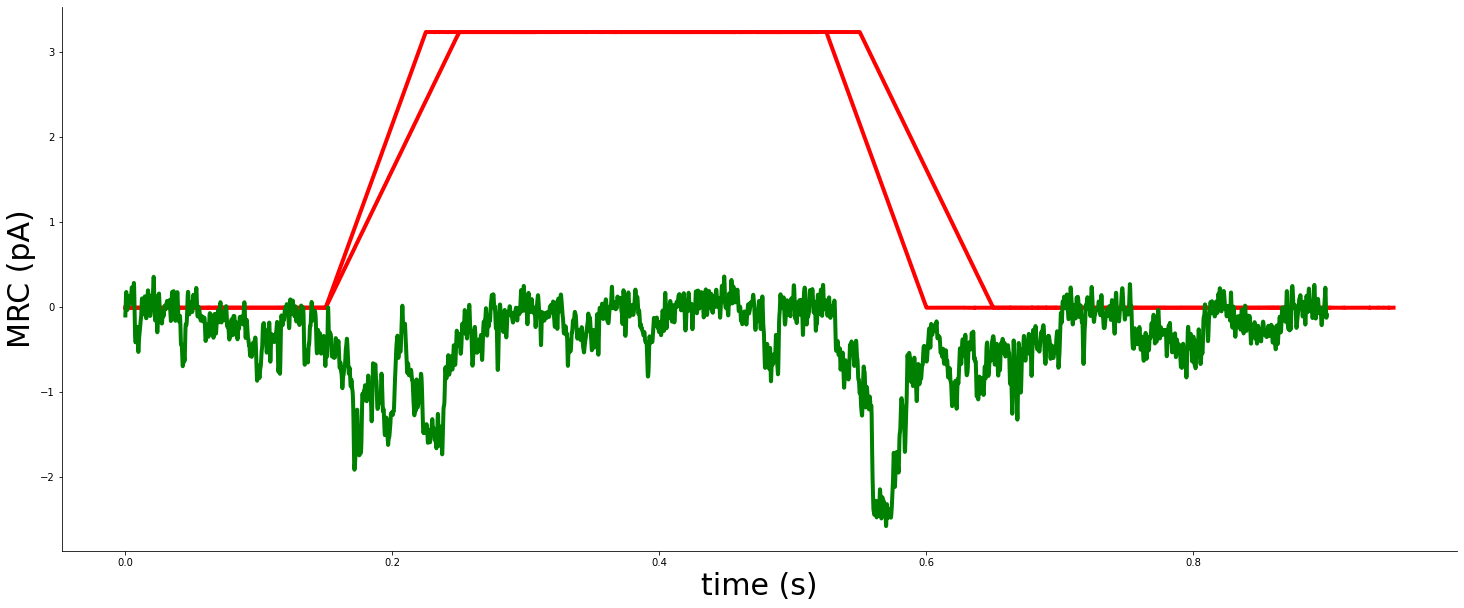

In [40]:
# Here is to analysis the Trapzoidal data in TrapRate 25

g=3 

x1 = np.arange(len(myfile.data[g,23,0,1]))/10000
x2 = np.arange(len(myfile.data[g,23,1,1]))/10000
#x3 = np.arange(len(myfile.data[g,22,2,1]))/10000
#x4 = np.arange(len(myfile.data[g,22,3,1]))/10000
#x5 = np.arange(len(myfile.data[g,22,4,1]))/10000
    
y1=stim_trap_swp1 = myfile.data[g,23,0,1]
y2=stim_trap_swp2 = myfile.data[g,23,1,1]
#y3=stim_trap_swp3 = myfile.data[g,22,2,1]
#y4=stim_trap_swp4 = myfile.data[g,22,3,1]
#y5=stim_trap_swp5 = myfile.data[g,22,4,1]

# creat empty list of 1-5 sweeps and later put all three sweeps into this empty list
trap_swps=[]
sw1 = []
sw2 = []
sw3 = []
sw4 = []
sw5 = []

# create a for loop to collect 1-4 sweeps in three series
n=[23,28,33]
for i in n:
    sw1.append(myfile.data[g,i,0,0]*1000000000000)
    sw2.append(myfile.data[g,i,1,0]*1000000000000)
    #sw3.append(myfile.data[g,i,2,0]*1000000000000)
    #sw4.append(myfile.data[g,i,3,0]*1000000000000)
    #sw5.append(myfile.data[g,i,4,0]*1000000000000)
  
# Now calculate the mean of three repeats by averaging the nested lists (lists in lists)
# here I just want to print to give one expample of the mean of three same sweeps, here sweep #1.
xc1 = np.arange(len(myfile.data[g,23,0,0]))/10000
xc2 = np.arange(len(myfile.data[g,23,1,0]))/10000
#xc3 = np.arange(len(myfile.data[g,22,2,0]))/10000
#xc4 = np.arange(len(myfile.data[g,22,3,0]))/10000
#xc5 = np.arange(len(myfile.data[g,22,4,0]))/10000

sw1_mean = (sw1[0]+sw1[1]+sw1[2])/3
sw2_mean = (sw2[0]+sw2[1]+sw2[2])/3
#sw3_mean = (sw3[0]+sw3[1]+sw3[2])/3
#sw4_mean = (sw4[0]+sw4[1]+sw4[2])/3
#sw5_mean = (sw5[0]+sw5[1]+sw5[2])/3

trap_swps.append(sw1_mean)
trap_swps.append(sw2_mean)
#trap_swps.append(sw3_mean)
#trap_swps.append(sw4_mean)
#trap_swps.append(sw5_mean)

# plot the averaged traces

fig, ax = plt.subplots (figsize=(25,10)) # set figure size
ax.spines ['top'].set_visible (False)
ax.spines ['right'].set_visible (False)
ax.set_xlabel ('time (s)', fontsize = 30)
ax.set_ylabel ('MRC (pA)', fontsize = 30)

#plt.plot (x, y1, 'o', markersize = 8, color = 'b')
plt.plot (x1, stim_trap_swp1, 'r-', lw=4)
plt.plot (x2, stim_trap_swp2, 'r-', lw=4)
#plt.plot (x3, stim_trap_swp3, 'r-', lw=4)
#plt.plot (x4, stim_trap_swp4, 'r-', lw=4)
#plt.plot (x5, stim_trap_swp5, 'r-', lw=4)

#plt.plot (xc1, gaussian_filter (sw1_mean, 3), 'g-', lw=4)
plt.plot (xc2, gaussian_filter (sw2_mean, 3), 'g-', lw=4)
#plt.plot (xc3, gaussian_filter (sw3_mean, 3), 'g-', lw=4)
#plt.plot (xc4, gaussian_filter (sw4_mean, 3), 'g-', lw=4)
#plt.plot (xc5, gaussian_filter (sw5_mean, 3), 'g-', lw=4)

In [11]:
#TrapRate 25

t_peaks_on = []
amp_peaks_on = []


# it is very important to creat loops to fill the ampty lists
# do not forget to smooth the mean traces using gaussian_filter function
for i in range (5):
    t_peaks_on.append(np.argmax(-gaussian_filter(trap_swps[i][:3000],3))/10000)
    amp_peaks_on.append(gaussian_filter(trap_swps[i],3)[np.argmax(-gaussian_filter(trap_swps[i][:3000],3))])
   
    #t_peaks_off.append(((np.argmax(-mrc_swps[i][2000:3500]))+2000)/5000)
    #amp_peaks_off.append(mrc_swps[i][np.argmax(-mrc_swps[i][2000:3500])+2000])
t_start_act_on = []
#This for loop is to ...
y = [y1,y2,y3,y4,y5]
for i in range (0,5):
    t_start_act_on.append((np.argmax(np.diff(gaussian_filter(np.diff(y[i][:3000]),3))))/10000)


t_half_act_on = [] # trap_on current half-time to maximum current

# you cannot calculate list minus list directly
# calculation should only happen elements by elements
# here time point switch from second - s to milisecond - ms by dividing time with 1000
for i in range (5):
    t_half_act_on.append(((t_peaks_on [i] - t_start_act_on[i])/2)*1000)
    
    
t_half_decay_on = []


for i in range (5):
    n=t_peaks_on[i]*10000
    m=int(n)
    t_half_decay_on.append ((((np.argmax(gaussian_filter(trap_swps[i][m:3000],3) > (amp_peaks_on[i]*0.5))+m)*(1/10000)) - t_peaks_on[i])*1000)
       
trap_rate = [63,320,1568,7272,13333]
worm_strain = 5*['GN932']
cell_ID = 5*['ALMLW007']


TrapData = {'worm_strain': worm_strain, 'cell_ID': cell_ID,'trap_rate': trap_rate, 'amp_peaks_on': amp_peaks_on, 't_peaks_on':t_peaks_on, \
            't_start_act_on': t_start_act_on, 't_half_act_on': t_half_act_on,'t_half_decay_on': t_half_decay_on, 'group_number': g+1}
TrapDataFrame = pd.DataFrame(TrapData)
#EphysDataFrame = EphysDataFrame.set_index(['cell_ID'])    
                        
dfpath = 'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/' 
##C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys

#wb = pd.ExcelWriter(dfpath +'ALMLW001.xlsx', engine='xlsxwriter')
TrapDataFrame.to_csv(r'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/ALMLW007_trapx5.csv',index =False, index_label = 'stim_um')



IndexError: list index out of range

In [ ]:
myfile = heka_reader.Bundle ('191212.dat') # pick one specific recording file

In [ ]:
# Here is to analysis the Trapzoidal data in TrapRate x2

g=6 

x1 = np.arange(len(myfile.data[g,24,0,1]))/10000
x2 = np.arange(len(myfile.data[g,24,1,1]))/10000
x3 = np.arange(len(myfile.data[g,24,2,1]))/10000
x4 = np.arange(len(myfile.data[g,24,3,1]))/10000
#x5 = np.arange(len(myfile.data[g,22,4,1]))/10000
    
y1=stim_trap_swp1 = myfile.data[g,24,0,1]
y2=stim_trap_swp2 = myfile.data[g,24,1,1]
y3=stim_trap_swp3 = myfile.data[g,24,2,1]
y4=stim_trap_swp4 = myfile.data[g,24,3,1]
#y5=stim_trap_swp5 = myfile.data[g,22,4,1]

# creat empty list of 1-5 sweeps and later put all three sweeps into this empty list
trap_swps=[]
sw1 = []
sw2 = []
sw3 = []
sw4 = []
sw5 = []

# create a for loop to collect 1-4 sweeps in three series
n=[24,29,34]
for i in n:
    sw1.append(myfile.data[g,i,0,0]*1000000000000)
    sw2.append(myfile.data[g,i,1,0]*1000000000000)
    sw3.append(myfile.data[g,i,2,0]*1000000000000)
    sw4.append(myfile.data[g,i,3,0]*1000000000000)
    #sw5.append(myfile.data[g,i,4,0]*1000000000000)
  
# Now calculate the mean of three repeats by averaging the nested lists (lists in lists)
# here I just want to print to give one expample of the mean of three same sweeps, here sweep #1.
xc1 = np.arange(len(myfile.data[g,24,0,0]))/10000
xc2 = np.arange(len(myfile.data[g,24,1,0]))/10000
xc3 = np.arange(len(myfile.data[g,24,2,0]))/10000
xc4 = np.arange(len(myfile.data[g,24,3,0]))/10000
#xc5 = np.arange(len(myfile.data[g,22,4,0]))/10000

sw1_mean = (sw1[0]+sw1[1]+sw1[2])/3
sw2_mean = (sw2[0]+sw2[1]+sw2[2])/3
sw3_mean = (sw3[0]+sw3[1]+sw3[2])/3
sw4_mean = (sw4[0]+sw4[1]+sw4[2])/3
#sw5_mean = (sw5[0]+sw5[1]+sw5[2])/3

trap_swps.append(sw1_mean)
trap_swps.append(sw2_mean)
trap_swps.append(sw3_mean)
trap_swps.append(sw4_mean)
#trap_swps.append(sw5_mean)

# plot the averaged traces

fig, ax = plt.subplots (figsize=(25,10)) # set figure size
ax.spines ['top'].set_visible (False)
ax.spines ['right'].set_visible (False)
ax.set_xlabel ('time (s)', fontsize = 30)
ax.set_ylabel ('MRC (pA)', fontsize = 30)

#plt.plot (x, y1, 'o', markersize = 8, color = 'b')
plt.plot (x1, stim_trap_swp1, 'r-', lw=4)
plt.plot (x2, stim_trap_swp2, 'r-', lw=4)
plt.plot (x3, stim_trap_swp3, 'r-', lw=4)
plt.plot (x4, stim_trap_swp4, 'r-', lw=4)
#plt.plot (x5, stim_trap_swp5, 'r-', lw=4)

plt.plot (xc1, gaussian_filter (sw1_mean, 3), 'g-', lw=4)
plt.plot (xc2, gaussian_filter (sw2_mean, 3), 'g-', lw=4)
plt.plot (xc3, gaussian_filter (sw3_mean, 3), 'g-', lw=4)
plt.plot (xc4, gaussian_filter (sw4_mean, 3), 'g-', lw=4)
#plt.plot (xc5, gaussian_filter (sw5_mean, 3), 'g-', lw=4)

In [ ]:
#TrapRate x2

t_peaks_on = []
amp_peaks_on = []


# it is very important to creat loops to fill the ampty lists
# do not forget to smooth the mean traces using gaussian_filter function
for i in range (4):
    t_peaks_on.append(np.argmax(-gaussian_filter(trap_swps[i][:3000],3))/10000)
    amp_peaks_on.append(gaussian_filter(trap_swps[i],3)[np.argmax(-gaussian_filter(trap_swps[i][:3000],3))])
   
    #t_peaks_off.append(((np.argmax(-mrc_swps[i][2000:3500]))+2000)/5000)
    #amp_peaks_off.append(mrc_swps[i][np.argmax(-mrc_swps[i][2000:3500])+2000])
t_start_act_on = []
#This for loop is to ...
y = [y1,y2,y3,y4]
for i in range (0,4):
    t_start_act_on.append((np.argmax(np.diff(gaussian_filter(np.diff(y[i][:3000]),3))))/10000)


t_half_act_on = [] # trap_on current half-time to maximum current

# you cannot calculate list minus list directly
# calculation should only happen elements by elements
# here time point switch from second - s to milisecond - ms by dividing time with 1000
for i in range (4):
    t_half_act_on.append(((t_peaks_on [i] - t_start_act_on[i])/2)*1000)
    
    
t_half_decay_on = []


for i in range (4):
    n=t_peaks_on[i]*10000
    m=int(n)
    t_half_decay_on.append ((((np.argmax(gaussian_filter(trap_swps[i][m:3000],3) > (amp_peaks_on[i]*0.5))+m)*(1/10000)) - t_peaks_on[i])*1000)
       
trap_rate = [2580,3809,7272,13333]
worm_strain = 4*['TU2769']
cell_ID = 4*['ALMLW020']


TrapData = {'worm_strain': worm_strain, 'cell_ID': cell_ID,'trap_rate': trap_rate, 'amp_peaks_on': amp_peaks_on, 't_peaks_on':t_peaks_on, \
            't_start_act_on': t_start_act_on, 't_half_act_on': t_half_act_on,'t_half_decay_on': t_half_decay_on, 'group_number': g+1}
TrapDataFrame = pd.DataFrame(TrapData)
#EphysDataFrame = EphysDataFrame.set_index(['cell_ID'])    
                        
dfpath = 'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/' 
##C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys

#wb = pd.ExcelWriter(dfpath +'ALMLW001.xlsx', engine='xlsxwriter')
TrapDataFrame.to_csv(r'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/ALMLW020_trapx2.csv',index =False, index_label = 'stim_um')


In [ ]:
myfile = heka_reader.Bundle ('191212.dat') # pick one specific recording file

In [ ]:
# Here is to analysis the Trapzoidal data in TrapRate 1

g=6 

x1 = np.arange(len(myfile.data[g,25,0,1]))/10000
x2 = np.arange(len(myfile.data[g,25,1,1]))/10000
#x3 = np.arange(len(myfile.data[g,22,2,1]))/10000
#x4 = np.arange(len(myfile.data[g,22,3,1]))/10000
#x5 = np.arange(len(myfile.data[g,22,4,1]))/10000
    
y1=stim_trap_swp1 = myfile.data[g,25,0,1]
y2=stim_trap_swp2 = myfile.data[g,25,1,1]
#y3=stim_trap_swp3 = myfile.data[g,22,2,1]
#y4=stim_trap_swp4 = myfile.data[g,22,3,1]
#y5=stim_trap_swp5 = myfile.data[g,22,4,1]

# creat empty list of 1-5 sweeps and later put all three sweeps into this empty list
trap_swps=[]
sw1 = []
sw2 = []
sw3 = []
sw4 = []
sw5 = []

# create a for loop to collect 1-4 sweeps in three series
n=[25,30,35]
for i in n:
    sw1.append(myfile.data[g,i,0,0]*1000000000000)
    sw2.append(myfile.data[g,i,1,0]*1000000000000)
    #sw3.append(myfile.data[g,i,2,0]*1000000000000)
    #sw4.append(myfile.data[g,i,3,0]*1000000000000)
    #sw5.append(myfile.data[g,i,4,0]*1000000000000)
  
# Now calculate the mean of three repeats by averaging the nested lists (lists in lists)
# here I just want to print to give one expample of the mean of three same sweeps, here sweep #1.
xc1 = np.arange(len(myfile.data[g,25,0,0]))/10000
xc2 = np.arange(len(myfile.data[g,25,1,0]))/10000
#xc3 = np.arange(len(myfile.data[g,22,2,0]))/10000
#xc4 = np.arange(len(myfile.data[g,22,3,0]))/10000
#xc5 = np.arange(len(myfile.data[g,22,4,0]))/10000

sw1_mean = (sw1[0]+sw1[1]+sw1[2])/3
sw2_mean = (sw2[0]+sw2[1]+sw2[2])/3
#sw3_mean = (sw3[0]+sw3[1]+sw3[2])/3
#sw4_mean = (sw4[0]+sw4[1]+sw4[2])/3
#sw5_mean = (sw5[0]+sw5[1]+sw5[2])/3

trap_swps.append(sw1_mean)
trap_swps.append(sw2_mean)
#trap_swps.append(sw3_mean)
#trap_swps.append(sw4_mean)
#trap_swps.append(sw5_mean)

# plot the averaged traces

fig, ax = plt.subplots (figsize=(25,10)) # set figure size
ax.spines ['top'].set_visible (False)
ax.spines ['right'].set_visible (False)
ax.set_xlabel ('time (s)', fontsize = 30)
ax.set_ylabel ('MRC (pA)', fontsize = 30)

#plt.plot (x, y1, 'o', markersize = 8, color = 'b')
plt.plot (x1, stim_trap_swp1, 'r-', lw=4)
plt.plot (x2, stim_trap_swp2, 'r-', lw=4)
#plt.plot (x3, stim_trap_swp3, 'r-', lw=4)
#plt.plot (x4, stim_trap_swp4, 'r-', lw=4)
#plt.plot (x5, stim_trap_swp5, 'r-', lw=4)

plt.plot (xc1, gaussian_filter (sw1_mean, 3), 'g-', lw=4)
plt.plot (xc2, gaussian_filter (sw2_mean, 3), 'g-', lw=4)
#plt.plot (xc3, gaussian_filter (sw3_mean, 3), 'g-', lw=4)
#plt.plot (xc4, gaussian_filter (sw4_mean, 3), 'g-', lw=4)
#plt.plot (xc5, gaussian_filter (sw5_mean, 3), 'g-', lw=4)

In [ ]:
#TrapRate 1

t_peaks_on = []
amp_peaks_on = []


# it is very important to creat loops to fill the ampty lists
# do not forget to smooth the mean traces using gaussian_filter function
for i in range (2):
    t_peaks_on.append(np.argmax(-gaussian_filter(trap_swps[i][:3000],3))/10000)
    amp_peaks_on.append(gaussian_filter(trap_swps[i],3)[np.argmax(-gaussian_filter(trap_swps[i][:3000],3))])
   
    #t_peaks_off.append(((np.argmax(-mrc_swps[i][2000:3500]))+2000)/5000)
    #amp_peaks_off.append(mrc_swps[i][np.argmax(-mrc_swps[i][2000:3500])+2000])
t_start_act_on = []
#This for loop is to ...
y = [y1,y2]
for i in range (0,2):
    t_start_act_on.append((np.argmax(np.diff(gaussian_filter(np.diff(y[i][:3000]),3))))/10000)


t_half_act_on = [] # trap_on current half-time to maximum current

# you cannot calculate list minus list directly
# calculation should only happen elements by elements
# here time point switch from second - s to milisecond - ms by dividing time with 1000
for i in range (2):
    t_half_act_on.append(((t_peaks_on [i] - t_start_act_on[i])/2)*1000)
    
    
t_half_decay_on = []


for i in range (2):
    n=t_peaks_on[i]*10000
    m=int(n)
    t_half_decay_on.append ((((np.argmax(gaussian_filter(trap_swps[i][m:3000],3) > (amp_peaks_on[i]*0.5))+m)*(1/10000)) - t_peaks_on[i])*1000)
       
trap_rate = [6153,11428]
worm_strain = 2*['TU2769']
cell_ID = 2*['ALMLW020']


TrapData = {'worm_strain': worm_strain, 'cell_ID': cell_ID,'trap_rate': trap_rate, 'amp_peaks_on': amp_peaks_on, 't_peaks_on':t_peaks_on, \
            't_start_act_on': t_start_act_on, 't_half_act_on': t_half_act_on,'t_half_decay_on': t_half_decay_on, 'group_number': g+1}
TrapDataFrame = pd.DataFrame(TrapData)
#EphysDataFrame = EphysDataFrame.set_index(['cell_ID'])    
                        
dfpath = 'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/' 
##C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys

#wb = pd.ExcelWriter(dfpath +'ALMLW001.xlsx', engine='xlsxwriter')
TrapDataFrame.to_csv(r'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/ALMLW020_trap1.csv',index =False, index_label = 'stim_um')



In [ ]:
t_half_act_on = [] # trap_on current half-time to maximum current

# you cannot calculate list minus list directly
# calculation should only happen elements by elements
# here time point switch from second - s to milisecond - ms by dividing time with 1000
for i in range (4):
    t_half_act_on.append(((t_peaks_on [i] - t_start_act_on[i])/2)*1000)
    
    
    
print (t_half_act_on)



In [ ]:
t_half_decay_on = []


for i in range (4):
    n=t_peaks_on[i]*10000
    m=int(n)
    t_half_decay_on.append ((((np.argmax(gaussian_filter(trap_swps[i][m:3000],3) > (amp_peaks_on[i]*0.5))+m)*(1/10000)) - t_peaks_on[i])*1000)
       
    
print (t_half_decay_on)


In [ ]:
trap_rate = [80,800,7272,13333]
worm_strain = 4*['GN932']
cell_ID = 4*['ALMLW010']
g=2

TrapData = {'worm_strain': worm_strain, 'cell_ID': cell_ID,'trap_rate': trap_rate, 'amp_peaks_on': amp_peaks_on, 't_peaks_on':t_peaks_on, \
            't_start_act_on': t_start_act_on, 't_half_act_on': t_half_act_on,'t_half_decay_on': t_half_decay_on, 'group_number': g+1}
TrapDataFrame = pd.DataFrame(TrapData)
#EphysDataFrame = EphysDataFrame.set_index(['cell_ID'])

TrapDataFrame

In [ ]:
dfpath = 'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/' 
##C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys

#wb = pd.ExcelWriter(dfpath +'ALMLW001.xlsx', engine='xlsxwriter')
TrapDataFrame.to_csv(r'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/ALMLW010_trapx10.csv',index =False, index_label = 'stim_um')
